# Scenarios and historical emissions

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from IPython.display import Image
from IPython.display import IFrame

In [2]:
seconds_in_year = 31536000
area_earth = 5.1006447295*pow(10,14)
NO2_molar_mass = 46.006 #g/mol
NO_molar_mass =  30.006 #g/mol

In [3]:
# ROAD emissions
file_ssp119_road_2015_2100 = '/pool/data/MESSY/DATA/MESSy2/raw/offemis/CMIP6/CMIP6v1.1_DLR1.0_ssp119_road_MISC_201501-210012.nc'
file_ssp245_road_2015_2100 = '/pool/data/MESSY/DATA/MESSy2/raw/offemis/CMIP6/CMIP6v1.1_DLR1.0_ssp245_road_MISC_201501-210012.nc'
file_ssp370_road_2015_2100 = '/pool/data/MESSY/DATA/MESSy2/raw/offemis/CMIP6/CMIP6v1.1_DLR1.0_ssp370_road_MISC_201501-210012.nc'
file_ssp370_road_2015_2100_lowNTCF = '/pool/data/MESSY/DATA/MESSy2/raw/offemis/CMIP6/CMIP6v1.1_DLR1.0_ssp370-lowNTCF_road_MISC_201501-210012.nc'

In [4]:
# 'lev' has only one value, and it messes with the coordinates order. Drop it for ease of plot
data_ssp119_road_2015_2100 = xr.open_dataset(file_ssp119_road_2015_2100).drop('lev')
data_ssp245_road_2015_2100 = xr.open_dataset(file_ssp245_road_2015_2100).drop('lev')
data_ssp370_road_2015_2100 = xr.open_dataset(file_ssp370_road_2015_2100).drop('lev')
data_ssp370_road_2015_2100_lowNTCF = xr.open_dataset(file_ssp370_road_2015_2100_lowNTCF).drop('lev')

In [5]:
# returns total yearly average emission in Tg
def yearly_global_weighted_averages(data, specie = 'CO', long_name = None, sector = None):
    
    if long_name != None:
        name = long_name
    else: 
        name = specie + '_flux'
        
    if sector != None:
        emission = data[name][:,sector,:,:].resample(time="1YS").mean(dim="time")
    else:
        emission = data[name].resample(time="1YS").mean(dim="time")
        
    # Create a weight array for the zonal average
    weight_emission = np.cos(np.deg2rad(emission.lat)) #deg2rad converts the latitude from degrees to radians
    weight_emission = weight_emission / weight_emission.sum() #weigh each latitudinal band by dividing it by the summed weights

    # Average over lon, zonal average over lan
    emission_lon = emission.mean(dim='lon')
    emission_weighted = []
    if sector != None:
        for year in range(emission.shape[0]):
            emission_weighted.append(np.sum(emission_lon[year, :] * weight_emission).data *  area_earth * pow(10, -9) * seconds_in_year)
    else:
        for year in range(emission.shape[0]):
            emission_weighted.append(np.sum(emission_lon[year, :, :] * weight_emission).data *  area_earth * pow(10, -9) * seconds_in_year)
        
    # The flux of NOx is in kg(NO2)/m^2/s, but to better compare it with other inventories we want it in kg(NO)/m^2/s
    if specie == 'NOx':
        emission_weighted = list(np.array(emission_weighted)/NO2_molar_mass*NO_molar_mass)
    else:
        emission_weighted = list(np.array(emission_weighted))
    
    return emission_weighted 

In [6]:
def make_emission_plottable(file_name, column_name):
    emissions = pd.read_csv(file_name, sep = ',')
    emissions.columns = ['Date', column_name]
    return emissions.set_index(pd.to_datetime(emissions['Date'])).drop(columns = ['Date'])

In [7]:
CO_ssp119_road_yearly_global_weighted_averages = yearly_global_weighted_averages(data_ssp119_road_2015_2100, 'CO')
NH3_ssp119_road_yearly_global_weighted_averages = yearly_global_weighted_averages(data_ssp119_road_2015_2100, 'NH3')
NOx_ssp119_road_yearly_global_weighted_averages = yearly_global_weighted_averages(data_ssp119_road_2015_2100, 'NOx')
SO2_ssp119_road_yearly_global_weighted_averages = yearly_global_weighted_averages(data_ssp119_road_2015_2100, 'SO2')

CO_ssp245_road_yearly_global_weighted_averages = yearly_global_weighted_averages(data_ssp245_road_2015_2100, 'CO')
NH3_ssp245_road_yearly_global_weighted_averages = yearly_global_weighted_averages(data_ssp245_road_2015_2100, 'NH3')
NOx_ssp245_road_yearly_global_weighted_averages = yearly_global_weighted_averages(data_ssp245_road_2015_2100, 'NOx')
SO2_ssp245_road_yearly_global_weighted_averages = yearly_global_weighted_averages(data_ssp245_road_2015_2100, 'SO2')

CO_ssp370_road_yearly_global_weighted_averages = yearly_global_weighted_averages(data_ssp370_road_2015_2100, 'CO')
NH3_ssp370_road_yearly_global_weighted_averages = yearly_global_weighted_averages(data_ssp370_road_2015_2100, 'NH3')
NOx_ssp370_road_yearly_global_weighted_averages = yearly_global_weighted_averages(data_ssp370_road_2015_2100, 'NOx')
SO2_ssp370_road_yearly_global_weighted_averages = yearly_global_weighted_averages(data_ssp370_road_2015_2100, 'SO2')

CO_ssp370_road_yearly_global_weighted_averages_lowNTCF = yearly_global_weighted_averages(data_ssp370_road_2015_2100_lowNTCF, 'CO')
NH3_ssp370_road_yearly_global_weighted_averages_lowNTCF = yearly_global_weighted_averages(data_ssp370_road_2015_2100_lowNTCF, 'NH3')
NOx_ssp370_road_yearly_global_weighted_averages_lowNTCF = yearly_global_weighted_averages(data_ssp370_road_2015_2100_lowNTCF, 'NOx')
SO2_ssp370_road_yearly_global_weighted_averages_lowNTCF = yearly_global_weighted_averages(data_ssp370_road_2015_2100_lowNTCF, 'SO2')

In [8]:
CO_ssp460_road_file =  '/work/bd1063/b309253/emissions/ssps-anthro-co-ssp460-ye.csv'
NH3_ssp460_road_file = '/work/bd1063/b309253/emissions/ssps-anthro-nh3-ssp460-y.csv'
NOx_ssp460_road_file = '/work/bd1063/b309253/emissions/ssps-anthro-nox-ssp460-y.csv'
SO2_ssp460_road_file = '/work/bd1063/b309253/emissions/ssps-anthro-so2-ssp460-y.csv'

In [9]:
CO_ssp585_road_file =  '/work/bd1063/b309253/emissions/ssps-anthro-co-ssp585-ye.csv'
NH3_ssp585_road_file = '/work/bd1063/b309253/emissions/ssps-anthro-nh3-ssp585-y.csv'
NOx_ssp585_road_file = '/work/bd1063/b309253/emissions/ssps-anthro-nox-ssp585-y.csv'
SO2_ssp585_road_file = '/work/bd1063/b309253/emissions/ssps-anthro-so2-ssp585-y.csv'

In [10]:
CO_ssp460_road = make_emission_plottable(CO_ssp460_road_file, 'SSP460')
NH3_ssp460_road = make_emission_plottable(NH3_ssp460_road_file, 'SSP460')
NOx_ssp460_road = make_emission_plottable(NOx_ssp460_road_file, 'SSP460')
SO2_ssp460_road = make_emission_plottable(SO2_ssp460_road_file, 'SSP460')

In [11]:
CO_ssp585_road = make_emission_plottable(CO_ssp585_road_file, 'SSP585')
NH3_ssp585_road = make_emission_plottable(NH3_ssp585_road_file, 'SSP585')
NOx_ssp585_road = make_emission_plottable(NOx_ssp585_road_file, 'SSP585')
SO2_ssp585_road = make_emission_plottable(SO2_ssp585_road_file, 'SSP585')

In [12]:
emissions_CO_road = pd.DataFrame({'SSP119': CO_ssp119_road_yearly_global_weighted_averages,
                             'SSP245': CO_ssp245_road_yearly_global_weighted_averages,
                             'SSP370': CO_ssp370_road_yearly_global_weighted_averages,
                             'SSP370 loxNTCF': CO_ssp370_road_yearly_global_weighted_averages_lowNTCF},
                           index=pd.date_range("1/1/2015", periods=86, freq='Y'))
emissions_NH3_road = pd.DataFrame({'SSP119': NH3_ssp119_road_yearly_global_weighted_averages,
                             'SSP245': NH3_ssp245_road_yearly_global_weighted_averages,
                             'SSP370': NH3_ssp370_road_yearly_global_weighted_averages,
                             'SSP370 loxNTCF': NH3_ssp370_road_yearly_global_weighted_averages_lowNTCF},
                            index=pd.date_range("1/1/2015", periods=86, freq='Y'))
emissions_NOx_road = pd.DataFrame({'SSP119': NOx_ssp119_road_yearly_global_weighted_averages,
                             'SSP245': NOx_ssp245_road_yearly_global_weighted_averages,
                             'SSP370': NOx_ssp370_road_yearly_global_weighted_averages,
                             'SSP370 loxNTCF': NOx_ssp370_road_yearly_global_weighted_averages_lowNTCF},
                            index=pd.date_range("1/1/2015", periods=86, freq='Y'))
emissions_SO2_road = pd.DataFrame({'SSP119': SO2_ssp119_road_yearly_global_weighted_averages,
                             'SSP245': SO2_ssp245_road_yearly_global_weighted_averages,
                             'SSP370': SO2_ssp370_road_yearly_global_weighted_averages,
                             'SSP370 loxNTCF': SO2_ssp370_road_yearly_global_weighted_averages_lowNTCF}, 
                             index=pd.date_range("1/1/2015", periods=86, freq='Y'))

In [13]:
fig4, axs4 = plt.subplots(2,2)
fig4.set_figwidth(12)

emissions_NOx_road.plot(title = 'Yearly total road emissions of NOx across scenarios', ax= axs4[0,0])
NOx_ssp460_road.plot(ax= axs4[0,0])
NOx_ssp585_road.plot(ax= axs4[0,0])
emissions_NH3_road.plot(title = 'Yearly total road emissions of NH3 across scenarios', ax= axs4[0,1])
NH3_ssp460_road.plot(ax= axs4[0,1])
NH3_ssp585_road.plot(ax= axs4[0,1])
emissions_CO_road.plot(title = 'Yearly total road emissions of CO across scenarios', ax= axs4[1,0])
CO_ssp460_road.plot(ax= axs4[1,0])
CO_ssp585_road.plot(ax= axs4[1,0])
emissions_SO2_road.plot(title = 'Yearly total road emissions of SO2 across scenarios', ax= axs4[1,1])
SO2_ssp460_road.plot(ax= axs4[1,1])
SO2_ssp585_road.plot(ax= axs4[1,1])

axs4[0,0].set_ylabel('Tg')
axs4[1,0].set_ylabel('Tg')


fig4.tight_layout()

Data from SSP scenarios: 

    - SSP1, 1.9 radiative forcing
    - SSP2, 4.5 radiative forcing
    - SSP3, 7.0 radiative forcing
    - SSP3, 7.0 radiative forcing, low Near-Term Climate Forcers
    - SSP4, 6.0 radiative forcing
    - SSP5, 8.5 radiative forcing

Sector is **road**. TODO: definition of sector

# Historical road emissions

In [14]:
path_hist = '/pool/data/MESSY/DATA/MESSy2/raw/offemis/CMIP6/CMIP6v6.1_DLR1.0_DECK_road_MISC_175001-201412.nc'
data_hist = xr.open_dataset(path_hist)

In [15]:
data_hist

<xarray.Dataset>
Dimensions:    (lon: 720, bnds: 2, lat: 360, lev: 1, time: 3180)
Coordinates:
  * lon        (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat        (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lev        (lev) float64 45.0
  * time       (time) object 1750-01-16 00:00:00 ... 2014-12-16 00:00:00
Dimensions without coordinates: bnds
Data variables:
    lon_bnds   (lon, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    time_bnds  (time, bnds) object ...
    CO_flux    (time, lev, lat, lon) float32 ...
    NH3_flux   (time, lev, lat, lon) float32 ...
    NOx_flux   (time, lev, lat, lon) float32 ...
    SO2_flux   (time, lev, lat, lon) float32 ...
Attributes: (12/39)
    CDI:                         Climate Data Interface version 1.7.0 (http:/...
    Conventions:                 CF-1.6
    history:                     Tue Aug 28 23:02:02 2018: cdo -O -Q copy /sc...
    source:                      CEDS-2017-08-30: Community Emissions Data Sy...
    institution:                 Pacific Northwest National Laboratory - Join...
    reference1:                  Lamarque et al.(2010), doi:10.5194/acp-10-70...
    ...                          ...
    data_usage_tips:             Note that these are monthly average fluxes.
    reporting_unit:              Mass flux of BC, reported as carbon mass
    nominal_resolution:          50 km
    source_id:                   CEDS-2017-08-30
    tracking_id:                 hdl:21.14100/649247a5-afc6-4e25-b777-9d7a77a...
    CDO:                         Climate Data Operators version 1.7.0 (http:/...

In [16]:
CO_hist_road_yearly_global_weighted_averages = yearly_global_weighted_averages(data_hist, 'CO')
NH3_hist_road_yearly_global_weighted_averages = yearly_global_weighted_averages(data_hist, 'NH3')
NOx_hist_road_yearly_global_weighted_averages = yearly_global_weighted_averages(data_hist, 'NOx')
SO2_hist_road_yearly_global_weighted_averages = yearly_global_weighted_averages(data_hist, 'SO2')

In [17]:
CO_hist_emissions = pd.DataFrame({'CO hist': CO_hist_road_yearly_global_weighted_averages}, index = pd.date_range("1/1/1750", periods=265, freq='Y')) 
NH3_hist_emissions = pd.DataFrame({'NH3 hist': NH3_hist_road_yearly_global_weighted_averages}, index = pd.date_range("1/1/1750", periods=265, freq='Y')) 
NOx_hist_emissions = pd.DataFrame({'NOx hist': NOx_hist_road_yearly_global_weighted_averages}, index = pd.date_range("1/1/1750", periods=265, freq='Y')) 
SO2_hist_emissions = pd.DataFrame({'SO2 hist': SO2_hist_road_yearly_global_weighted_averages}, index = pd.date_range("1/1/1750", periods=265, freq='Y')) 

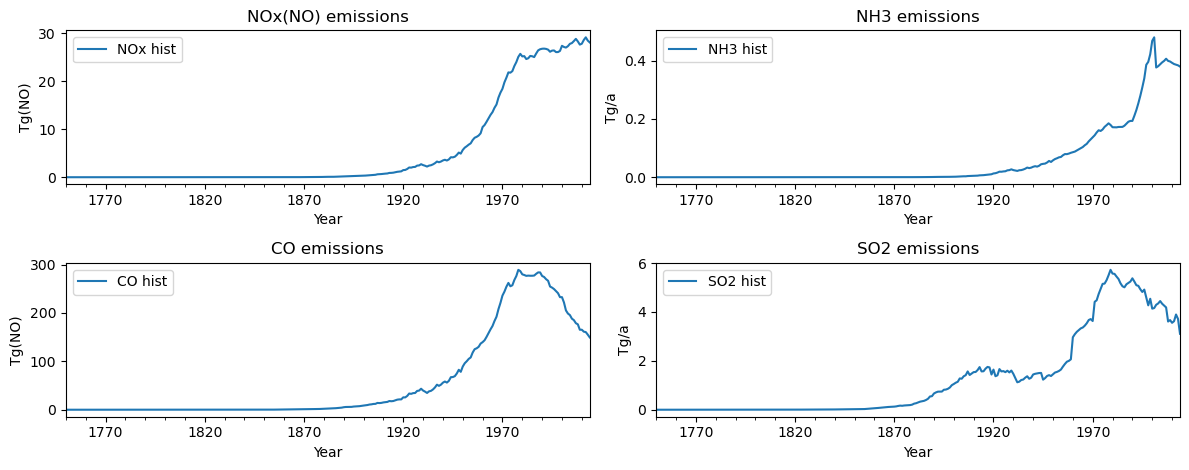

In [18]:
fig, axs = plt.subplots(2,2)
fig.set_figwidth(12)

NOx_hist_emissions.plot(ax = axs[0,0])
axs[0,0].set_title('NOx(NO) emissions')
axs[0,0].set_xlabel('Year')
axs[0,0].set_ylabel('Tg/a')

NH3_hist_emissions.plot(ax = axs[0,1])
axs[0,1].set_title('NH3 emissions')
axs[0,1].set_xlabel('Year')
axs[0,1].set_ylabel('Tg/a')

CO_hist_emissions.plot(ax = axs[1,0])
axs[1,0].set_title('CO emissions')
axs[1,0].set_xlabel('Year')
axs[1,0].set_ylabel('Tg/a')

SO2_hist_emissions.plot(ax = axs[1,1])
axs[1,1].set_title('SO2 emissions')
axs[1,1].set_xlabel('Year')
axs[1,1].set_ylabel('Tg/a')

axs[0,0].set_ylabel('Tg(NO)')
axs[1,0].set_ylabel('Tg(NO)')

fig.tight_layout()

Historical emissions from CMIP6v6.1 DLR1.0, experiment is DECK, sector is road. 

TODO:
- definition of DECK experiment
- features of v6
- definition of road

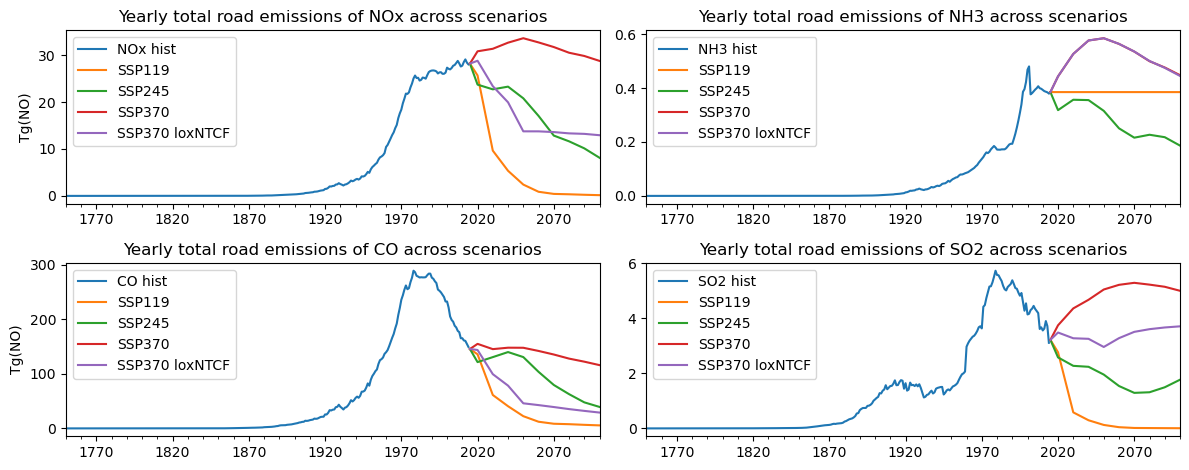

In [19]:
fig4, axs4 = plt.subplots(2,2)
fig4.set_figwidth(12)

NOx_hist_emissions.plot(ax= axs4[0,0])
emissions_NOx_road.plot(title = 'Yearly total road emissions of NOx across scenarios', ax= axs4[0,0])
NH3_hist_emissions.plot(ax= axs4[0,1])
emissions_NH3_road.plot(title = 'Yearly total road emissions of NH3 across scenarios', ax= axs4[0,1])
CO_hist_emissions.plot(ax= axs4[1,0])
emissions_CO_road.plot(title = 'Yearly total road emissions of CO across scenarios', ax= axs4[1,0])
SO2_hist_emissions.plot(ax= axs4[1,1])
emissions_SO2_road.plot(title = 'Yearly total road emissions of SO2 across scenarios', ax= axs4[1,1])

axs4[0,0].set_ylabel('Tg(NO)')
axs4[1,0].set_ylabel('Tg(NO)')


fig4.tight_layout()

## Zooming in:

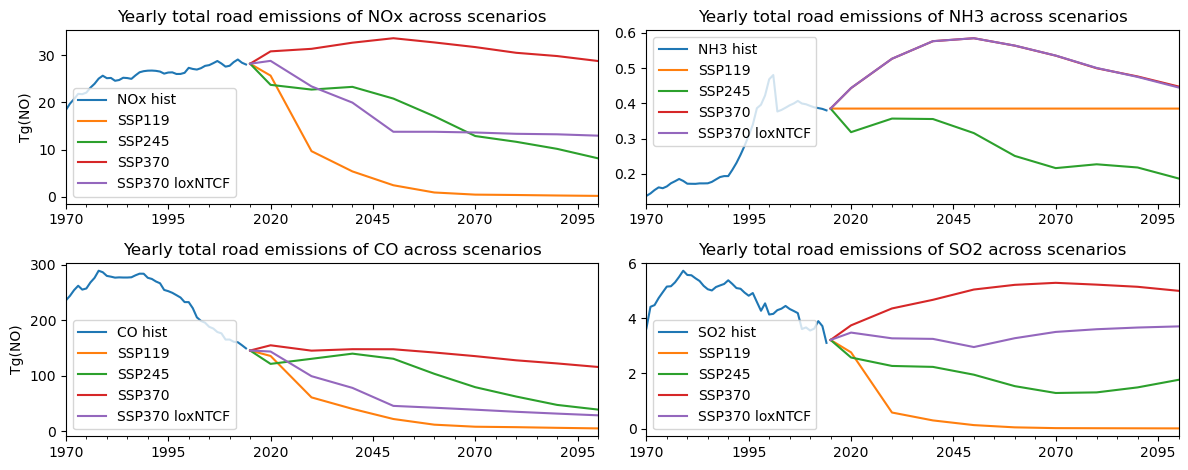

In [20]:
fig4, axs4 = plt.subplots(2,2)
fig4.set_figwidth(12)

NOx_hist_emissions[220:].plot(ax= axs4[0,0])
emissions_NOx_road.plot(title = 'Yearly total road emissions of NOx across scenarios', ax= axs4[0,0])
NH3_hist_emissions[220:].plot(ax= axs4[0,1])
emissions_NH3_road.plot(title = 'Yearly total road emissions of NH3 across scenarios', ax= axs4[0,1])
CO_hist_emissions[220:].plot(ax= axs4[1,0])
emissions_CO_road.plot(title = 'Yearly total road emissions of CO across scenarios', ax= axs4[1,0])
SO2_hist_emissions[220:].plot(ax= axs4[1,1])
emissions_SO2_road.plot(title = 'Yearly total road emissions of SO2 across scenarios', ax= axs4[1,1])

axs4[0,0].set_ylabel('Tg(NO)')
axs4[1,0].set_ylabel('Tg(NO)')


fig4.tight_layout()

# Other emission catalogues

We look at some emissions catalogues to see how emissions have been evolving since 2015:
 * CAMS data (seems to underestimate emissions for NOx)
 * CEDS v_2021_04_21 

## NOx

In [21]:
cams_nox_file = '/work/bd1063/b309253/emissions/cams-glob-ant-anthro-nox.csv'
cams_nox_data = pd.read_csv(cams_nox_file, sep=',')
cams_nox_data.columns = ['Date', 'CAMS Road']
cams_nox_data['CAMS Road'] = cams_nox_data['CAMS Road']
cams_nox_data = cams_nox_data.set_index(pd.date_range("1/1/2000", periods=24, freq='Y')).drop(columns = ['Date'])

In [22]:
ceds_nox_file = '/work/bd1063/b309253/emissions/ceds-anthro-nox-yearly.csv'
ceds_nox_data = pd.read_csv(ceds_nox_file, sep=',')
ceds_nox_data.columns = ['Date', 'CEDS tranport']
ceds_nox_data['CEDS tranport'] = ceds_nox_data['CEDS tranport']
ceds_nox_data = ceds_nox_data.set_index(pd.date_range("1/1/1950", periods=70, freq='Y')).drop(columns = ['Date'])

Text(0, 0.5, 'Tg(N)/a')

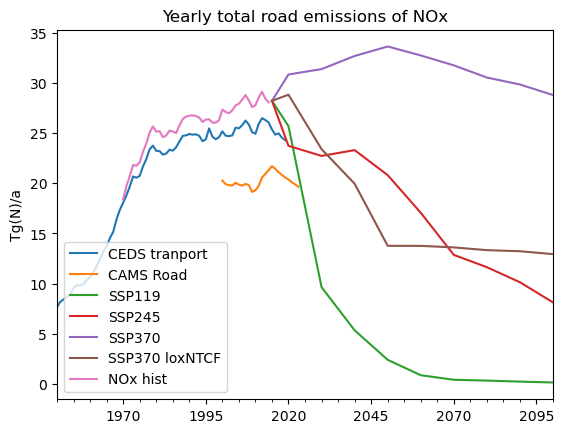

In [23]:
ax = ceds_nox_data.plot()
cams_nox_data.plot(ax=ax)
emissions_NOx_road.plot(ax=ax)
NOx_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total road emissions of NOx')
ax.set_ylabel('Tg(N)/a')

## NH3

In [24]:
cams_nh3_file = '/work/bd1063/b309253/emissions/cams-glob-ant-anthro-nh3.csv'
cams_nh3_data = pd.read_csv(cams_nh3_file, sep=',')
cams_nh3_data.columns = ['Date', 'CAMS Road']
cams_nh3_data = cams_nh3_data.set_index(pd.date_range("1/1/2000", periods=24, freq='Y')).drop(columns = ['Date'])

In [25]:
ceds_nh3_file = '/work/bd1063/b309253/emissions/ceds-anthro-nh3-yearly.csv'
ceds_nh3_data = pd.read_csv(ceds_nh3_file, sep=',')
ceds_nh3_data.columns = ['Date', 'CEDS tranport']
ceds_nh3_data = ceds_nh3_data.set_index(pd.date_range("1/1/1950", periods=70, freq='Y')).drop(columns = ['Date'])

Text(0, 0.5, 'Tg(N)/a')

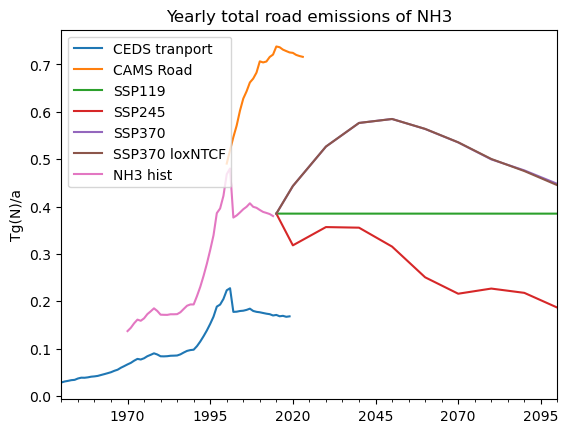

In [26]:
ax = ceds_nh3_data.plot()
cams_nh3_data.plot(ax=ax)
emissions_NH3_road.plot(ax=ax)
NH3_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total road emissions of NH3')
ax.set_ylabel('Tg(N)/a')

# SO2

In [27]:
cams_so2_file = '/work/bd1063/b309253/emissions/cams-glob-ant-anthro-so2.csv'
cams_so2_data = pd.read_csv(cams_so2_file, sep=',')
cams_so2_data.columns = ['Date', 'CAMS Road']
cams_so2_data = cams_so2_data.set_index(pd.date_range("1/1/2000", periods=24, freq='Y')).drop(columns = ['Date'])

In [28]:
ceds_so2_file = '/work/bd1063/b309253/emissions/ceds-anthro-so2-yearly.csv'
ceds_so2_data = pd.read_csv(ceds_so2_file, sep=',')
ceds_so2_data.columns = ['Date', 'CEDS tranport']
ceds_so2_data = ceds_so2_data.set_index(pd.date_range("1/1/1950", periods=70, freq='Y')).drop(columns = ['Date'])

Text(0, 0.5, 'Tg(N)/a')

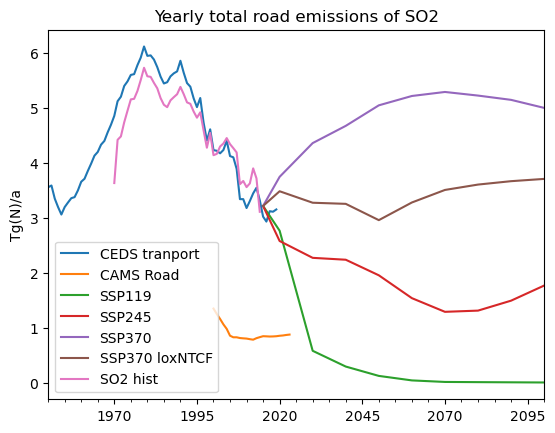

In [29]:
ax = ceds_so2_data.plot()
cams_so2_data.plot(ax=ax)
emissions_SO2_road.plot(ax=ax)
SO2_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total road emissions of SO2')
ax.set_ylabel('Tg(N)/a')

# CO

In [30]:
cams_co_file = '/work/bd1063/b309253/emissions/cams-glob-ant-anthro-co.csv'
cams_co_data = pd.read_csv(cams_co_file, sep=',')
cams_co_data.columns = ['Date', 'CAMS Road']
cams_co_data = cams_co_data.set_index(pd.date_range("1/1/2000", periods=24, freq='Y')).drop(columns = ['Date'])

In [31]:
ceds_co_file = '/work/bd1063/b309253/emissions/ceds-anthro-co-yearly.csv'
ceds_co_data = pd.read_csv(ceds_co_file, sep=',')
ceds_co_data.columns = ['Date', 'CEDS tranport']
ceds_co_data = ceds_co_data.set_index(pd.date_range("1/1/1950", periods=70, freq='Y')).drop(columns = ['Date'])

In [32]:
ax = ceds_co_data.plot()
cams_co_data.plot(ax=ax)
emissions_CO_road.plot(ax=ax)
CO_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total road emissions of CO')
ax.set_ylabel('Tg(N)/a')

Text(0, 0.5, 'Tg(N)/a')

# Visualizing all species together

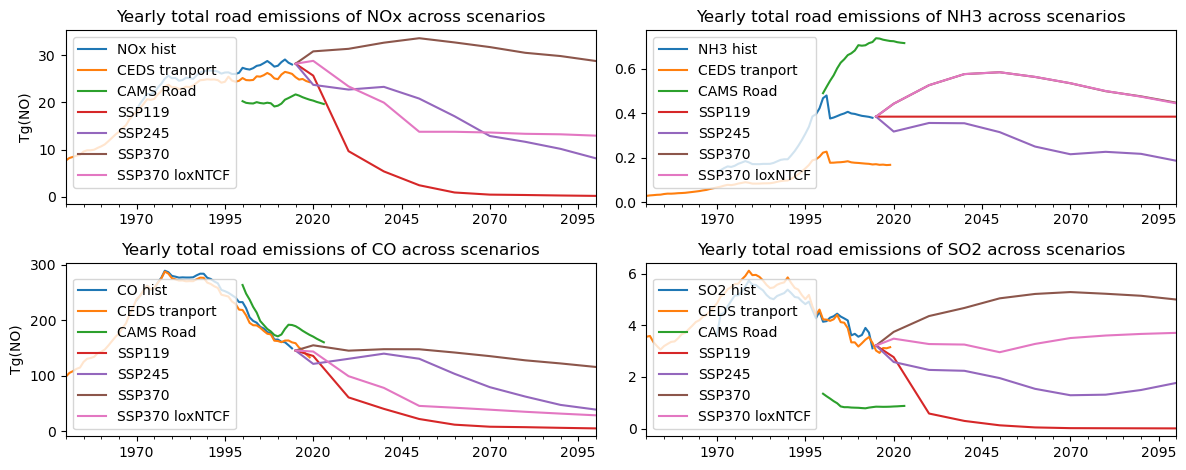

In [33]:
fig4, axs4 = plt.subplots(2,2)
fig4.set_figwidth(12)

NOx_hist_emissions[220:].plot(ax= axs4[0,0])
ceds_nox_data.plot(ax= axs4[0,0])
cams_nox_data.plot(ax= axs4[0,0])
emissions_NOx_road.plot(title = 'Yearly total road emissions of NOx across scenarios', ax= axs4[0,0])
NH3_hist_emissions[220:].plot(ax= axs4[0,1])
ceds_nh3_data.plot(ax= axs4[0,1])
cams_nh3_data.plot(ax= axs4[0,1])
emissions_NH3_road.plot(title = 'Yearly total road emissions of NH3 across scenarios', ax= axs4[0,1])
CO_hist_emissions[220:].plot(ax= axs4[1,0])
ceds_co_data.plot(ax= axs4[1,0])
cams_co_data.plot(ax= axs4[1,0])
emissions_CO_road.plot(title = 'Yearly total road emissions of CO across scenarios', ax= axs4[1,0])
SO2_hist_emissions[220:].plot(ax= axs4[1,1])
ceds_so2_data.plot(ax= axs4[1,1])
cams_so2_data.plot(ax= axs4[1,1])
emissions_SO2_road.plot(title = 'Yearly total road emissions of SO2 across scenarios', ax= axs4[1,1])

axs4[0,0].set_ylabel('Tg(NO)')
axs4[1,0].set_ylabel('Tg(NO)')

fig4.tight_layout()

# Looking at Eclipse inventories

In [34]:
eclipse_nox_file = '/work/bd1063/b309253/emissions/eclipse-v6-anthro-nox-cl.csv'
eclipse_nox_data = pd.read_csv(eclipse_nox_file, sep=',')
eclipse_nox_data.columns = ['Date', 'ECLIPSE v6 Transportation']
eclipse_nox_data = eclipse_nox_data.set_index(pd.to_datetime(eclipse_nox_data['Date'])).drop(columns = ['Date'])

Text(0, 0.5, 'Tg(N)/a')

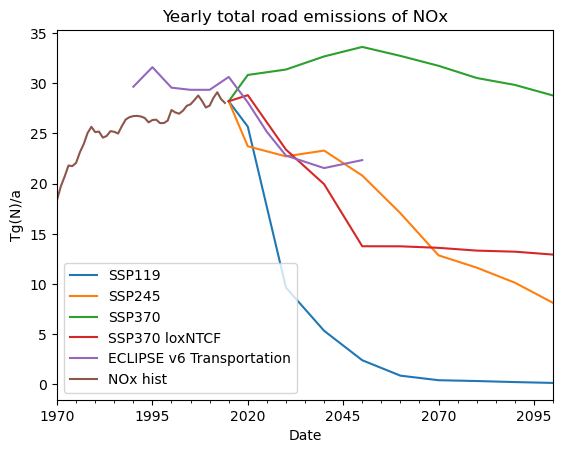

In [35]:
ax = emissions_NOx_road.plot()
eclipse_nox_data.plot(ax=ax)
NOx_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total road emissions of NOx')
ax.set_ylabel('Tg(N)/a')

In [36]:
eclipse_co_file = '/work/bd1063/b309253/emissions/eclipse-v6-anthro-co-cle.csv'
eclipse_co_data = pd.read_csv(eclipse_co_file, sep=',')
eclipse_co_data.columns = ['Date', 'ECLIPSE Transportation']
eclipse_co_data['ECLIPSE Transportation'] = eclipse_co_data['ECLIPSE Transportation']
eclipse_co_data = eclipse_co_data.set_index(pd.to_datetime(eclipse_co_data['Date'])).drop(columns = ['Date'])

Text(0, 0.5, 'Tg(N)/a')

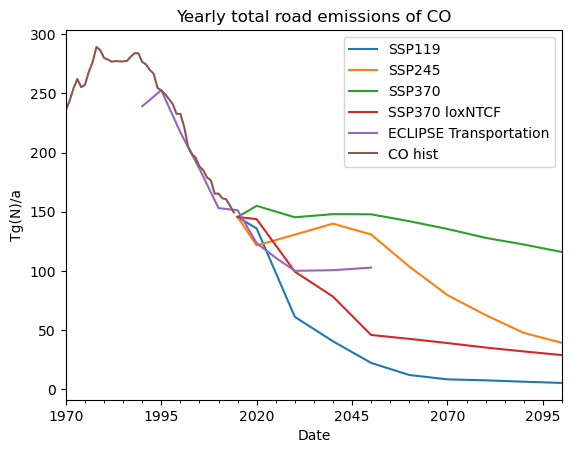

In [37]:
ax = emissions_CO_road.plot()
eclipse_co_data.plot(ax=ax)
CO_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total road emissions of CO')
ax.set_ylabel('Tg(N)/a')

In [38]:
eclipse_so2_file = '/work/bd1063/b309253/emissions/eclipse-v6-anthro-so2-cl.csv'
eclipse_so2_data = pd.read_csv(eclipse_so2_file, sep=',')
eclipse_so2_data.columns = ['Date', 'ECLIPSE Transportation']
eclipse_so2_data['ECLIPSE Transportation'] = eclipse_so2_data['ECLIPSE Transportation']
eclipse_so2_data = eclipse_so2_data.set_index(pd.to_datetime(eclipse_so2_data['Date'])).drop(columns = ['Date'])

Text(0, 0.5, 'Tg(N)/a')

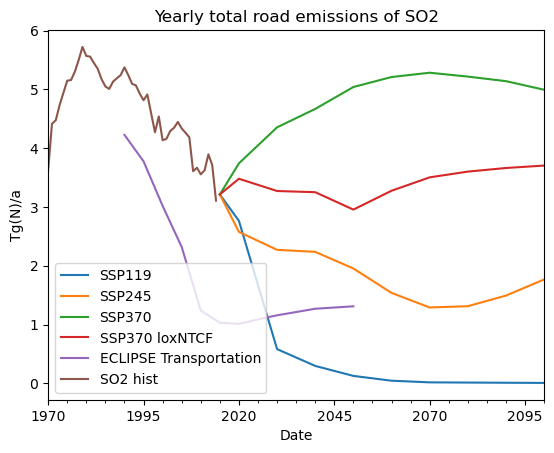

In [39]:
ax = emissions_SO2_road.plot()
eclipse_so2_data.plot(ax=ax)
SO2_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total road emissions of SO2')
ax.set_ylabel('Tg(N)/a')

In [40]:
eclipse_nh3_file = '/work/bd1063/b309253/emissions/eclipse-v6-anthro-nh3-cl.csv'
eclipse_nh3_data = pd.read_csv(eclipse_nh3_file, sep=',')
eclipse_nh3_data.columns = ['Date', 'ECLIPSE Transportation']
eclipse_nh3_data = eclipse_nh3_data.set_index(pd.to_datetime(eclipse_nh3_data['Date'])).drop(columns = ['Date'])

Text(0, 0.5, 'Tg(N)/a')

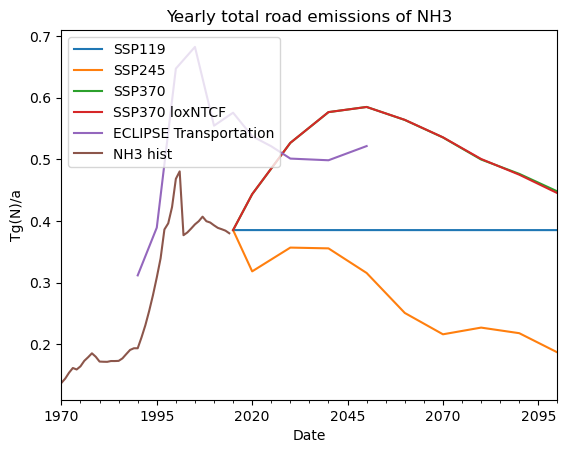

In [41]:
ax = emissions_NH3_road.plot()
eclipse_nh3_data.plot(ax=ax)
NH3_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total road emissions of NH3')
ax.set_ylabel('Tg(N)/a')

## Eclipse v5 and its scenarios

### NOx

In [135]:
eclipse5_cle_nox_file = '/work/bd1063/b309253/emissions/eclipse-gains-v5a-anthro-cle-nox.csv'
eclipse5_cle2degrees_nox_file = '/work/bd1063/b309253/emissions/eclipse-gains-v5a-anthro-cle-2degrees-nox.csv'
eclipse5_mfr_nox_file = '/work/bd1063/b309253/emissions/eclipse-gains-v5a-anthro-mfr-nox.csv'
eclipse5_slcp_nox_file = '/work/bd1063/b309253/emissions/eclipse-gains-v5a-anthro-slcp-nox.csv'

In [136]:
eclipse5_cle_nox_data = pd.read_csv(eclipse5_cle_nox_file, sep=',')
eclipse5_cle2degrees_nox_data = pd.read_csv(eclipse5_cle2degrees_nox_file, sep=',')
eclipse5_mfr_nox_data = pd.read_csv(eclipse5_mfr_nox_file, sep=',')
eclipse5_slcp_nox_data = pd.read_csv(eclipse5_slcp_nox_file, sep=',')

In [137]:
eclipse5_cle_nox_data.columns = ['Date', 'ECLIPSEv.5 CLE']
eclipse5_cle2degrees_nox_data.columns = ['Date', 'ECLIPSEv.5 CLE 2 degrees']
eclipse5_mfr_nox_data.columns = ['Date', 'ECLIPSEv.5 MFR']
eclipse5_slcp_nox_data.columns = ['Date', 'ECLIPSEv.5 SLCP']

In [138]:
eclipse5_cle_nox_data = eclipse5_cle_nox_data.set_index(pd.to_datetime(eclipse5_cle_nox_data['Date'])).drop(columns = ['Date'])
eclipse5_cle2degrees_nox_data = eclipse5_cle2degrees_nox_data.set_index(pd.to_datetime(eclipse5_cle2degrees_nox_data['Date'])).drop(columns = ['Date'])
eclipse5_mfr_nox_data = eclipse5_mfr_nox_data.set_index(pd.to_datetime(eclipse5_mfr_nox_data['Date'])).drop(columns = ['Date'])
eclipse5_slcp_nox_data = eclipse5_slcp_nox_data.set_index(pd.to_datetime(eclipse5_slcp_nox_data['Date'])).drop(columns = ['Date'])

Text(0, 0.5, 'Tg(N)/a')

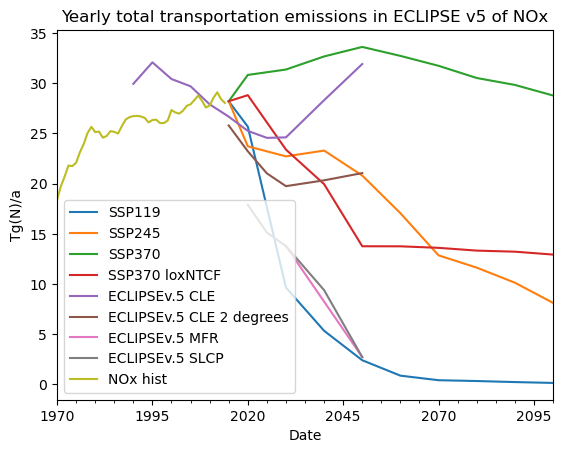

In [139]:
ax = emissions_NOx_road.plot()
eclipse5_cle_nox_data.plot(ax=ax)
eclipse5_cle2degrees_nox_data.plot(ax=ax)
eclipse5_mfr_nox_data.plot(ax=ax)
eclipse5_slcp_nox_data.plot(ax=ax)
NOx_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total transportation emissions in ECLIPSE v5 of NOx')
ax.set_ylabel('Tg(N)/a')

### CO

In [140]:
eclipse5_cle_co_file = '/work/bd1063/b309253/emissions/eclipse-gains-v5a-anthro-cle-co.csv'
eclipse5_cle2degrees_co_file = '/work/bd1063/b309253/emissions/eclipse-gains-v5a-anthro-cle-2degrees-co.csv'
eclipse5_mfr_co_file = '/work/bd1063/b309253/emissions/eclipse-gains-v5a-anthro-mfr-co.csv'
eclipse5_slcp_co_file = '/work/bd1063/b309253/emissions/eclipse-gains-v5a-anthro-slcp-co.csv'

In [141]:
eclipse5_cle_co_data = pd.read_csv(eclipse5_cle_co_file, sep=',')
eclipse5_cle2degrees_co_data = pd.read_csv(eclipse5_cle2degrees_co_file, sep=',')
eclipse5_mfr_co_data = pd.read_csv(eclipse5_mfr_co_file, sep=',')
eclipse5_slcp_co_data = pd.read_csv(eclipse5_slcp_co_file, sep=',')

In [142]:
eclipse5_cle_co_data.columns = ['Date', 'ECLIPSEv.5 CLE']
eclipse5_cle2degrees_co_data.columns = ['Date', 'ECLIPSEv.5 CLE 2 degrees']
eclipse5_mfr_co_data.columns = ['Date', 'ECLIPSEv.5 MFR']
eclipse5_slcp_co_data.columns = ['Date', 'ECLIPSEv.5 SLCP']

In [143]:
eclipse5_cle_co_data = eclipse5_cle_co_data.set_index(pd.to_datetime(eclipse5_cle_co_data['Date'])).drop(columns = ['Date'])
eclipse5_cle2degrees_co_data = eclipse5_cle2degrees_co_data.set_index(pd.to_datetime(eclipse5_cle2degrees_co_data['Date'])).drop(columns = ['Date'])
eclipse5_mfr_co_data = eclipse5_mfr_co_data.set_index(pd.to_datetime(eclipse5_mfr_co_data['Date'])).drop(columns = ['Date'])
eclipse5_slcp_co_data = eclipse5_slcp_co_data.set_index(pd.to_datetime(eclipse5_slcp_co_data['Date'])).drop(columns = ['Date'])

Text(0, 0.5, 'Tg(N)/a')

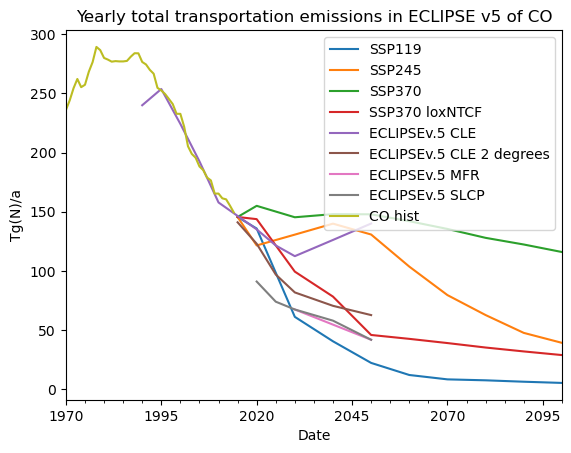

In [144]:
ax = emissions_CO_road.plot()
eclipse5_cle_co_data.plot(ax=ax)
eclipse5_cle2degrees_co_data.plot(ax=ax)
eclipse5_mfr_co_data.plot(ax=ax)
eclipse5_slcp_co_data.plot(ax=ax)
CO_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total transportation emissions in ECLIPSE v5 of CO')
ax.set_ylabel('Tg(N)/a')

### SO2

In [145]:
eclipse5_cle_so2_file = '/work/bd1063/b309253/emissions/eclipse-gains-v5a-anthro-cle-so2.csv'
eclipse5_cle2degrees_so2_file = '/work/bd1063/b309253/emissions/eclipse-gains-v5a-anthro-cle-2degrees-so2.csv'
eclipse5_mfr_so2_file = '/work/bd1063/b309253/emissions/eclipse-gains-v5a-anthro-mfr-so2.csv'
eclipse5_slcp_so2_file = '/work/bd1063/b309253/emissions/eclipse-gains-v5a-anthro-slcp-so2.csv'

In [146]:
eclipse5_cle_so2_data = pd.read_csv(eclipse5_cle_so2_file, sep=',')
eclipse5_cle2degrees_so2_data = pd.read_csv(eclipse5_cle2degrees_so2_file, sep=',')
eclipse5_mfr_so2_data = pd.read_csv(eclipse5_mfr_so2_file, sep=',')
eclipse5_slcp_so2_data = pd.read_csv(eclipse5_slcp_so2_file, sep=',')

In [147]:
eclipse5_cle_so2_data.columns = ['Date', 'ECLIPSEv.5 CLE']
eclipse5_cle2degrees_so2_data.columns = ['Date', 'ECLIPSEv.5 CLE 2 degrees']
eclipse5_mfr_so2_data.columns = ['Date', 'ECLIPSEv.5 MFR']
eclipse5_slcp_so2_data.columns = ['Date', 'ECLIPSEv.5 SLCP']

In [148]:
eclipse5_cle_so2_data = eclipse5_cle_so2_data.set_index(pd.to_datetime(eclipse5_cle_so2_data['Date'])).drop(columns = ['Date'])
eclipse5_cle2degrees_so2_data = eclipse5_cle2degrees_so2_data.set_index(pd.to_datetime(eclipse5_cle2degrees_so2_data['Date'])).drop(columns = ['Date'])
eclipse5_mfr_so2_data = eclipse5_mfr_so2_data.set_index(pd.to_datetime(eclipse5_mfr_so2_data['Date'])).drop(columns = ['Date'])
eclipse5_slcp_so2_data = eclipse5_slcp_so2_data.set_index(pd.to_datetime(eclipse5_slcp_so2_data['Date'])).drop(columns = ['Date'])

Text(0, 0.5, 'Tg(N)/a')

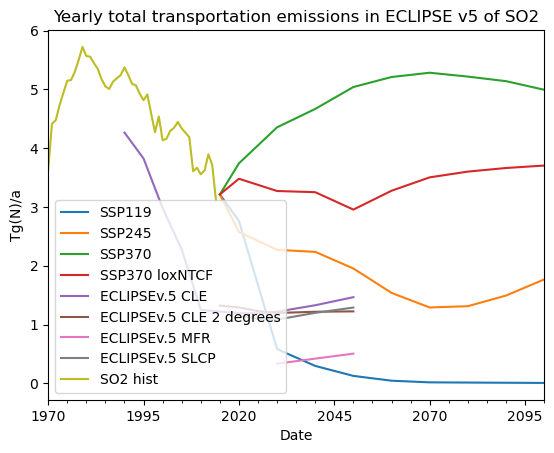

In [149]:
ax = emissions_SO2_road.plot()
eclipse5_cle_so2_data.plot(ax=ax)
eclipse5_cle2degrees_so2_data.plot(ax=ax)
eclipse5_mfr_so2_data.plot(ax=ax)
eclipse5_slcp_so2_data.plot(ax=ax)
SO2_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total transportation emissions in ECLIPSE v5 of SO2')
ax.set_ylabel('Tg(N)/a')

### NH3

In [150]:
eclipse5_cle_nh3_file = '/work/bd1063/b309253/emissions/eclipse-gains-v5a-anthro-cle-nh3.csv'
eclipse5_cle2degrees_nh3_file = '/work/bd1063/b309253/emissions/eclipse-gains-v5a-anthro-cle-2degrees-nh3.csv'
eclipse5_mfr_nh3_file = '/work/bd1063/b309253/emissions/eclipse-gains-v5a-anthro-mfr-nh3.csv'
eclipse5_slcp_nh3_file = '/work/bd1063/b309253/emissions/eclipse-gains-v5a-anthro-slcp-nh3.csv'

In [151]:
eclipse5_cle_nh3_data = pd.read_csv(eclipse5_cle_nh3_file, sep=',')
eclipse5_cle2degrees_nh3_data = pd.read_csv(eclipse5_cle2degrees_nh3_file, sep=',')
eclipse5_mfr_nh3_data = pd.read_csv(eclipse5_mfr_nh3_file, sep=',')
eclipse5_slcp_nh3_data = pd.read_csv(eclipse5_slcp_nh3_file, sep=',')

In [152]:
eclipse5_cle_nh3_data.columns = ['Date', 'ECLIPSEv.5 CLE']
eclipse5_cle2degrees_nh3_data.columns = ['Date', 'ECLIPSEv.5 CLE 2 degrees']
eclipse5_mfr_nh3_data.columns = ['Date', 'ECLIPSEv.5 MFR']
eclipse5_slcp_nh3_data.columns = ['Date', 'ECLIPSEv.5 SLCP']

In [153]:
eclipse5_cle_nh3_data = eclipse5_cle_nh3_data.set_index(pd.to_datetime(eclipse5_cle_nh3_data['Date'])).drop(columns = ['Date'])
eclipse5_cle2degrees_nh3_data = eclipse5_cle2degrees_nh3_data.set_index(pd.to_datetime(eclipse5_cle2degrees_nh3_data['Date'])).drop(columns = ['Date'])
eclipse5_mfr_nh3_data = eclipse5_mfr_nh3_data.set_index(pd.to_datetime(eclipse5_mfr_nh3_data['Date'])).drop(columns = ['Date'])
eclipse5_slcp_nh3_data = eclipse5_slcp_nh3_data.set_index(pd.to_datetime(eclipse5_slcp_nh3_data['Date'])).drop(columns = ['Date'])

Text(0, 0.5, 'Tg(N)/a')

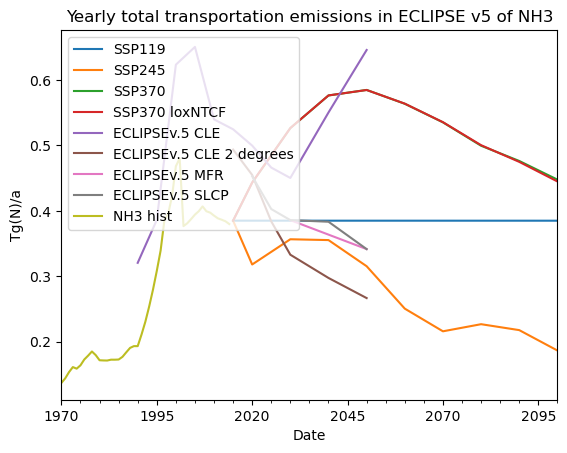

In [154]:
ax = emissions_NH3_road.plot()
eclipse5_cle_nh3_data.plot(ax=ax)
eclipse5_cle2degrees_nh3_data.plot(ax=ax)
eclipse5_mfr_nh3_data.plot(ax=ax)
eclipse5_slcp_nh3_data.plot(ax=ax)
NH3_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total transportation emissions in ECLIPSE v5 of NH3')
ax.set_ylabel('Tg(N)/a')

# Edgar

In [62]:
edgar_nox_file = '/work/bd1063/b309253/emissions/edgarv6-anthro-nox-yearl.csv'
edgar_nox_data = pd.read_csv(edgar_nox_file, sep=',')
edgar_nox_data.columns = ['Date', 'EDGAR non road','EDGAR v6 Transportation']
edgar_nox_data = edgar_nox_data.set_index(pd.date_range("1/1/1970", periods=49, freq='Y')).drop(columns = ['Date'])

Text(0, 0.5, 'Tg(N)/a')

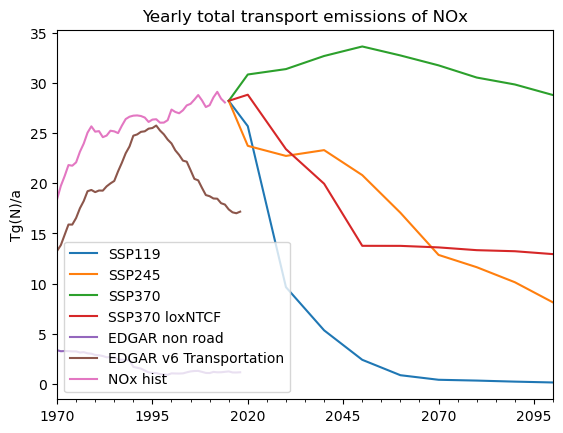

In [63]:
ax = emissions_NOx_road.plot()
edgar_nox_data.plot(ax=ax)
#eclipse_nox_data.plot(ax=ax)
NOx_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total transport emissions of NOx')
ax.set_ylabel('Tg(N)/a')

In [64]:
edgar_so2_file = '/work/bd1063/b309253/emissions/edgarv6-anthro-so2-yearl.csv'
edgar_so2_data = pd.read_csv(edgar_so2_file, sep=',')
edgar_so2_data.columns = ['Date', 'EDGAR v6 Transportation']
edgar_so2_data = edgar_so2_data.set_index(pd.date_range("1/1/1970", periods=49, freq='Y')).drop(columns = ['Date'])

Text(0, 0.5, 'Tg(N)/a')

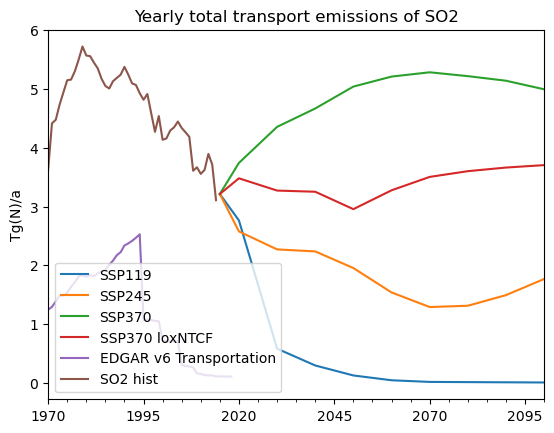

In [65]:
ax = emissions_SO2_road.plot()
edgar_so2_data.plot(ax=ax)
SO2_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total transport emissions of SO2')
ax.set_ylabel('Tg(N)/a')

In [66]:
edgar_co_file = '/work/bd1063/b309253/emissions/edgarv6-anthro-co-yearly.csv'
edgar_co_data = pd.read_csv(edgar_co_file, sep=',')
edgar_co_data.columns = ['Date', 'EDGAR v6 Transportation']
edgar_co_data = edgar_co_data.set_index(pd.date_range("1/1/1970", periods=49, freq='Y')).drop(columns = ['Date'])

Text(0, 0.5, 'Tg(N)/a')

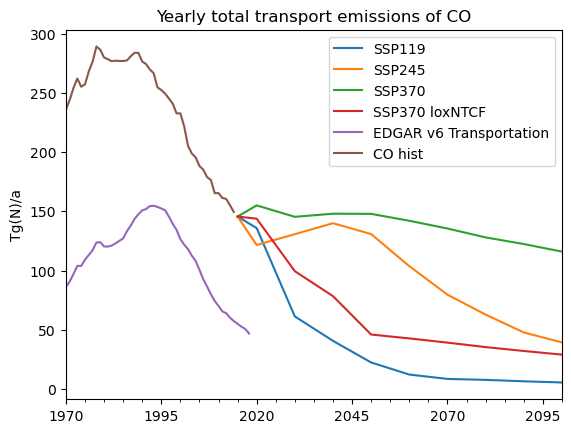

In [67]:
ax = emissions_CO_road.plot()
edgar_co_data.plot(ax=ax)
CO_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total transport emissions of CO')
ax.set_ylabel('Tg(N)/a')

In [68]:
edgar_nh3_file = '/work/bd1063/b309253/emissions/edgarv6-anthro-nh3-yearl.csv'
edgar_nh3_data = pd.read_csv(edgar_nh3_file, sep=',')
edgar_nh3_data.columns = ['Date', 'EDGAR v6 Transportation']
edgar_nh3_data = edgar_nh3_data.set_index(pd.date_range("1/1/1970", periods=49, freq='Y')).drop(columns = ['Date'])

Text(0, 0.5, 'Tg(N)/a')

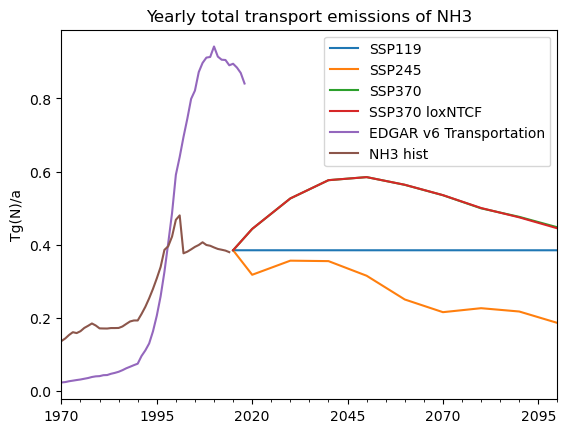

In [69]:
ax = emissions_NH3_road.plot()
edgar_nh3_data.plot(ax=ax)
NH3_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total transport emissions of NH3')
ax.set_ylabel('Tg(N)/a')

### Possibly also CEDS

In [70]:
path_ceds_dlr10 = glob.glob('/pool/data/MESSY/DATA/MESSy2/raw/offemis/CEDS/DLR1.0/CEDS_DLR1.0_2021-04-21_road_MISC*.nc')
data_ceds_dlr10 = xr.open_mfdataset(path_ceds_dlr10)

In [71]:
data_ceds_dlr10

<xarray.Dataset>
Dimensions:   (time: 840, lev: 1, lat: 360, lon: 720)
Coordinates:
  * lat       (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lev       (lev) int32 45
  * lon       (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * time      (time) object 1950-01-16 00:00:00 ... 2019-12-16 00:00:00
Data variables:
    CO_flux   (time, lev, lat, lon) float32 dask.array<chunksize=(120, 1, 360, 720), meta=np.ndarray>
    NH3_flux  (time, lev, lat, lon) float32 dask.array<chunksize=(120, 1, 360, 720), meta=np.ndarray>
    NOx_flux  (time, lev, lat, lon) float32 dask.array<chunksize=(120, 1, 360, 720), meta=np.ndarray>
    SO2_flux  (time, lev, lat, lon) float32 dask.array<chunksize=(120, 1, 360, 720), meta=np.ndarray>
Attributes:
    reference1:                 Lamarque et al.(2010), doi:10.5194/acp-10-701...
    reference2:                 Pozzer et al. (2009),doi:10.5194/acp-9-9417-2009
    creation_date:              Thu Jun 15 13:58:23 CEST 2023
    source:                     IAMC-2018-06-28: Integrated Assessment Modeli...
    title:                      Anthropogenic Emissions prepared for input4MIPs
    history:                    Wed Jun 28 16:01:02 2023: /work/bd0080/b30905...
    NCO:                        netCDF Operators version 5.1.4 (Homepage = ht...
    history_of_appended_files:  Thu Jun 15 14:18:03 2023: Appended file ./sce...

In [72]:
CO_ceds_dlr10_road_yearly_global_weighted_averages = yearly_global_weighted_averages(data_ceds_dlr10, 'CO')
NH3_ceds_dlr10_road_yearly_global_weighted_averages = yearly_global_weighted_averages(data_ceds_dlr10, 'NH3')
NOx_ceds_dlr10_road_yearly_global_weighted_averages = yearly_global_weighted_averages(data_ceds_dlr10, 'NOx')
SO2_ceds_dlr10_road_yearly_global_weighted_averages = yearly_global_weighted_averages(data_ceds_dlr10, 'SO2')

In [73]:
CO_ceds_dlr10_emissions = pd.DataFrame({'CO CEDS DLR10': CO_ceds_dlr10_road_yearly_global_weighted_averages}, index = pd.date_range("1/1/1950", periods=70, freq='Y')) 
NH3_ceds_dlr10_emissions = pd.DataFrame({'NH3 CEDS DLR10': NH3_ceds_dlr10_road_yearly_global_weighted_averages}, index = pd.date_range("1/1/1950", periods=70, freq='Y')) 
NOx_ceds_dlr10_emissions = pd.DataFrame({'NOx CEDS DLR10': NOx_ceds_dlr10_road_yearly_global_weighted_averages}, index = pd.date_range("1/1/1950", periods=70, freq='Y')) 
SO2_ceds_dlr10_emissions = pd.DataFrame({'SO2 CEDS DLR10': SO2_ceds_dlr10_road_yearly_global_weighted_averages}, index = pd.date_range("1/1/1950", periods=70, freq='Y')) 

Text(0, 0.5, 'Tg(N)/a')

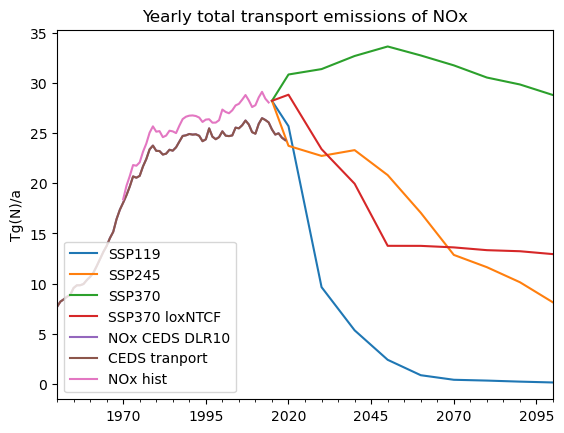

In [74]:
ax = emissions_NOx_road.plot()
NOx_ceds_dlr10_emissions.plot(ax=ax)
ceds_nox_data.plot(ax=ax)
NOx_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total transport emissions of NOx')
ax.set_ylabel('Tg(N)/a')

In [75]:
glob.glob('/pool/data/MESSY/DATA/MESSy2/raw/offemis/CEDS/2020-v1/*')

['/pool/data/MESSY/DATA/MESSy2/raw/offemis/CEDS/2020-v1/CEDS_2020-v1_hist_ENE_MISC_197001-201712.nc',
 '/pool/data/MESSY/DATA/MESSy2/raw/offemis/CEDS/2020-v1/CEDS_2020-v1_hist_anth_MISC_197001-201712.nc',
 '/pool/data/MESSY/DATA/MESSy2/raw/offemis/CEDS/2020-v1/CEDS_2020-v1_hist_SHP_MISC_197001-201712.nc',
 '/pool/data/MESSY/DATA/MESSy2/raw/offemis/CEDS/2020-v1/CEDS_2020-v1_hist_TRA_MISC_197001-201712.nc',
 '/pool/data/MESSY/DATA/MESSy2/raw/offemis/CEDS/2020-v1/CEDS_2020-v1_hist_AGR_MISC_197001-201712.nc',
 '/pool/data/MESSY/DATA/MESSy2/raw/offemis/CEDS/2020-v1/CEDS_2020-v1_hist_WST_MISC_197001-201712.nc',
 '/pool/data/MESSY/DATA/MESSy2/raw/offemis/CEDS/2020-v1/CEDS_2020-v1_hist_IND_MISC_197001-201712.nc',
 '/pool/data/MESSY/DATA/MESSy2/raw/offemis/CEDS/2020-v1/CEDS_2020-v1_hist_RCO_MISC_197001-201712.nc',
 '/pool/data/MESSY/DATA/MESSy2/raw/offemis/CEDS/2020-v1/CEDS_2020-v1_hist_SLV_MISC_197001-201712.nc',
 '/pool/data/MESSY/DATA/MESSy2/raw/offemis/CEDS/2020-v1/CEDS_2020-v1_hist_land_MI

In [76]:
path_ceds_v1 =  '/pool/data/MESSY/DATA/MESSy2/raw/offemis/CEDS/2020-v1/CEDS_2020-v1_hist_TRA_MISC_197001-201712.nc'
data_ceds_v1 = xr.open_mfdataset(path_ceds_v1, decode_times=False)

In [77]:
data_ceds_v1.time

<xarray.DataArray 'time' (time: 576)>
array([  0.,   1.,   2., ..., 573., 574., 575.], dtype=float32)
Coordinates:
  * time     (time) float32 0.0 1.0 2.0 3.0 4.0 ... 572.0 573.0 574.0 575.0
Attributes:
    long_name:  time
    units:      month since 1970-01-15 00:00:00

In [78]:
start_date = pd.to_datetime('1970-01-15')
num_months = 576
date_range = [start_date + pd.DateOffset(months=i) for i in range(num_months)]

In [79]:
data_ceds_v1['time'] = xr.DataArray(date_range, dims=['time'])

In [80]:
CO_ceds_v1_road_yearly_global_weighted_averages = yearly_global_weighted_averages(data_ceds_v1, 'CO')
NH3_ceds_v1_road_yearly_global_weighted_averages = yearly_global_weighted_averages(data_ceds_v1, 'NH3')
NOx_ceds_v1_road_yearly_global_weighted_averages = yearly_global_weighted_averages(data_ceds_v1, 'NOx')
SO2_ceds_v1_road_yearly_global_weighted_averages = yearly_global_weighted_averages(data_ceds_v1, 'SO2')

In [81]:
CO_ceds_v1_emissions = pd.DataFrame({'CO CEDS 2020v1': CO_ceds_v1_road_yearly_global_weighted_averages}, index = pd.date_range("15/1/1970", periods=48, freq='Y')) 
NH3_ceds_v1_emissions = pd.DataFrame({'NH3 CEDS 2020v1': NH3_ceds_v1_road_yearly_global_weighted_averages}, index = pd.date_range("15/1/1970", periods=48, freq='Y')) 
NOx_ceds_v1_emissions = pd.DataFrame({'NOx CEDS 2020v1': NOx_ceds_v1_road_yearly_global_weighted_averages}, index = pd.date_range("15/1/1970", periods=48, freq='Y')) 
SO2_ceds_v1_emissions = pd.DataFrame({'SO2 CEDS 2020v1': SO2_ceds_v1_road_yearly_global_weighted_averages}, index = pd.date_range("15/1/1970", periods=48, freq='Y')) 

In [82]:
avogadro = 6.022 * pow(10, 23)
tera = pow(10, 12)
molar_masss_nox = 46.
molar_mass_co = 28.
molar_mass_so2 = 64.
molar_mass_nh3 = 17.

In [83]:
NOx_ceds_v1_emissions = NOx_ceds_v1_emissions/ avogadro * molar_masss_nox / tera * pow(10, 9)

Text(0, 0.5, 'Tg(N)/a')

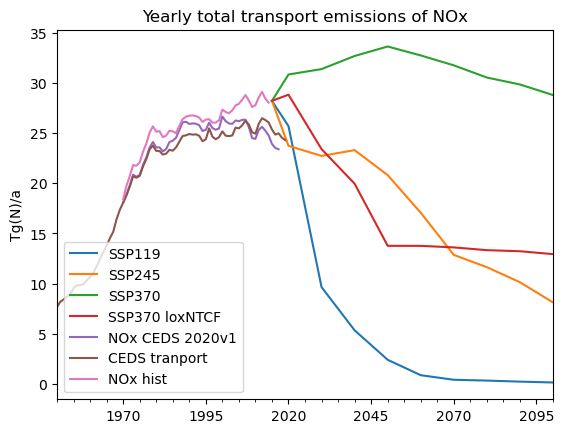

In [84]:
ax = emissions_NOx_road.plot()
NOx_ceds_v1_emissions.plot(ax=ax)
ceds_nox_data.plot(ax=ax)
NOx_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total transport emissions of NOx')
ax.set_ylabel('Tg(N)/a')

In [85]:
CO_ceds_v1_emissions = CO_ceds_v1_emissions/ avogadro * molar_mass_co / tera * pow(10, 9)

Text(0, 0.5, 'Tg(N)/a')

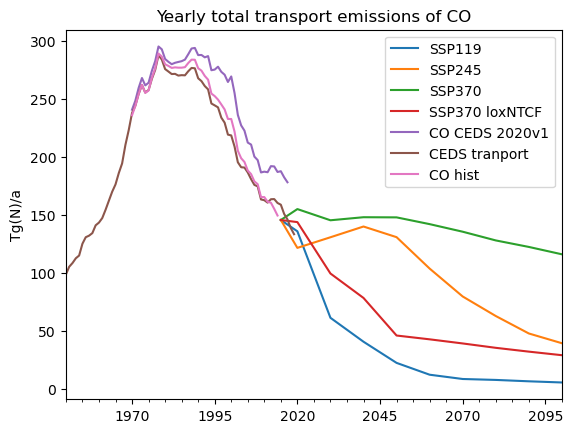

In [86]:
ax = emissions_CO_road.plot()
CO_ceds_v1_emissions.plot(ax=ax)
ceds_co_data.plot(ax=ax)
CO_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total transport emissions of CO')
ax.set_ylabel('Tg(N)/a')

In [87]:
SO2_ceds_v1_emissions= SO2_ceds_v1_emissions/ avogadro * molar_mass_so2 / tera * pow(10, 9)

Text(0, 0.5, 'Tg(N)/a')

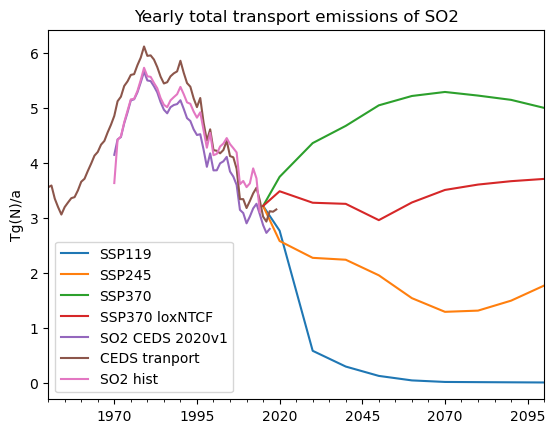

In [88]:
ax = emissions_SO2_road.plot()
SO2_ceds_v1_emissions.plot(ax=ax)
ceds_so2_data.plot(ax=ax)
SO2_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total transport emissions of SO2')
ax.set_ylabel('Tg(N)/a')

In [89]:
NH3_ceds_v1_emissions= NH3_ceds_v1_emissions/ avogadro * molar_mass_nh3 / tera * pow(10, 9)

Text(0, 0.5, 'Tg(N)/a')

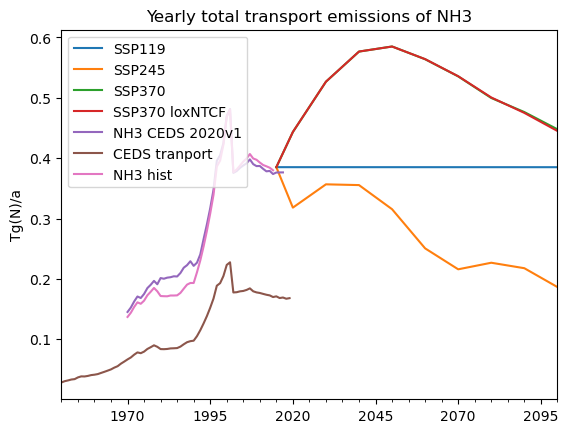

In [90]:
ax = emissions_NH3_road.plot()
NH3_ceds_v1_emissions.plot(ax=ax)
ceds_nh3_data.plot(ax=ax)
NH3_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total transport emissions of NH3')
ax.set_ylabel('Tg(N)/a')

# Other other CEDS emissions

In [91]:
path_ceds_gbd_nox = '/work/bd0080/EMISSIONS/CEDS/CEDS-GBD-MAPS/NOx/NOx-em-total-anthro_input4CMIP_emissions_CEDS-2020-v1_gn_197001-201712.nc'
data_ceds_gbd_nox = xr.open_dataset(path_ceds_gbd_nox)

In [92]:
data_ceds_gbd_nox_transport_yearly = yearly_global_weighted_averages(data_ceds_gbd_nox, 'NOx', 'NOx_em_anthro', sector = 4)

In [93]:
NOx_ceds_gbd_emissions = pd.DataFrame({'NOx CEDS GBD': data_ceds_gbd_nox_transport_yearly}, index = pd.date_range("16/1/1970", periods=48, freq='Y')) 

Text(0, 0.5, 'Tg(N)/a')

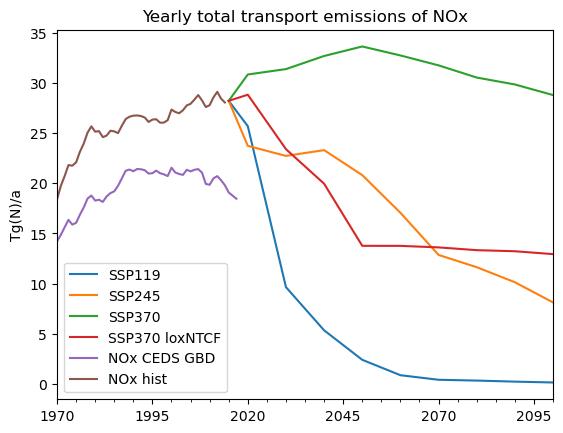

In [94]:
ax = emissions_NOx_road.plot()
NOx_ceds_gbd_emissions.plot(ax=ax)
NOx_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total transport emissions of NOx')
ax.set_ylabel('Tg(N)/a')

In [95]:
path_ceds_gbd_so2 = '/work/bd0080/EMISSIONS/CEDS/CEDS-GBD-MAPS/SO2/SO2-em-total-anthro_input4CMIP_emissions_CEDS-2020-v1_gn_197001-201712.nc'
data_ceds_gbd_so2 = xr.open_dataset(path_ceds_gbd_so2)

In [96]:
data_ceds_gbd_so2_transport = data_ceds_gbd_so2['SO2_em_anthro'][:,4,:,:]
data_ceds_gbd_so2_transport_yearly = yearly_global_weighted_averages(data_ceds_gbd_so2, 'SO2', 'SO2_em_anthro', sector = 4)
SO2_ceds_gbd_emissions = pd.DataFrame({'SO2 CEDS GBD': data_ceds_gbd_so2_transport_yearly}, index = pd.date_range("16/1/1970", periods=48, freq='Y')) 

In [97]:
ax = emissions_SO2_road.plot()
SO2_ceds_gbd_emissions.plot(ax=ax)
SO2_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total transport emissions of SO2')
ax.set_ylabel('Tg/a')

Text(0, 0.5, 'Tg/a')

In [98]:
path_ceds_gbd_co = '/work/bd0080/EMISSIONS/CEDS/CEDS-GBD-MAPS/CO/CO-em-total-anthro_input4CMIP_emissions_CEDS-2020-v1_gn_197001-201712.nc'
data_ceds_gbd_co = xr.open_dataset(path_ceds_gbd_co)

In [99]:
data_ceds_gbd_co_transport = data_ceds_gbd_co['CO_em_anthro'][:,4,:,:]
data_ceds_gbd_co_transport_yearly = yearly_global_weighted_averages(data_ceds_gbd_co, 'CO', 'CO_em_anthro', sector = 4)
co_ceds_gbd_emissions = pd.DataFrame({'CO CEDS GBD': data_ceds_gbd_co_transport_yearly}, index = pd.date_range("16/1/1970", periods=48, freq='Y')) 

In [100]:
ax = emissions_CO_road.plot()
co_ceds_gbd_emissions.plot(ax=ax)
CO_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total transport emissions of CO')
ax.set_ylabel('Tg/a')

Text(0, 0.5, 'Tg/a')

In [101]:
path_ceds_gbd_nh3 = '/work/bd0080/EMISSIONS/CEDS/CEDS-GBD-MAPS/NH3/NH3-em-total-anthro_input4CMIP_emissions_CEDS-2020-v1_gn_197001-201712.nc'
data_ceds_gbd_nh3 = xr.open_dataset(path_ceds_gbd_nh3)

In [102]:
data_ceds_gbd_nh3_transport = data_ceds_gbd_nh3['NH3_em_anthro'][:,4,:,:]
data_ceds_gbd_nh3_transport_yearly = yearly_global_weighted_averages(data_ceds_gbd_nh3, 'NH3', 'NH3_em_anthro', sector = 4)
nh3_ceds_gbd_emissions = pd.DataFrame({'NH3 CEDS GBD': data_ceds_gbd_nh3_transport_yearly}, index = pd.date_range("16/1/1970", periods=48, freq='Y')) 

In [103]:
ax = emissions_NH3_road.plot()
nh3_ceds_gbd_emissions.plot(ax=ax)
NH3_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total transport emissions of NH3')
ax.set_ylabel('Tg/a')

Text(0, 0.5, 'Tg/a')

### All CEDS together

In [104]:
ax = emissions_NOx_road.plot()
NOx_ceds_v1_emissions.plot(ax=ax)
NOx_ceds_gbd_emissions.plot(ax=ax)
ceds_nox_data.plot(ax=ax)
NOx_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total transport emissions of NOx')
ax.set_ylabel('Tg(N)/a')

Text(0, 0.5, 'Tg(N)/a')

In [105]:
ax = emissions_CO_road.plot()
CO_ceds_v1_emissions.plot(ax=ax)
co_ceds_gbd_emissions.plot(ax=ax)
ceds_co_data.plot(ax=ax)
CO_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total transport emissions of CO')
ax.set_ylabel('Tg/a')

Text(0, 0.5, 'Tg/a')

In [106]:
ax = emissions_SO2_road.plot()
SO2_ceds_v1_emissions.plot(ax=ax)
SO2_ceds_gbd_emissions.plot(ax=ax)
ceds_so2_data.plot(ax=ax)
SO2_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total transport emissions of SO2')
ax.set_ylabel('Tg/a')

Text(0, 0.5, 'Tg/a')

Text(0, 0.5, 'Tg/a')

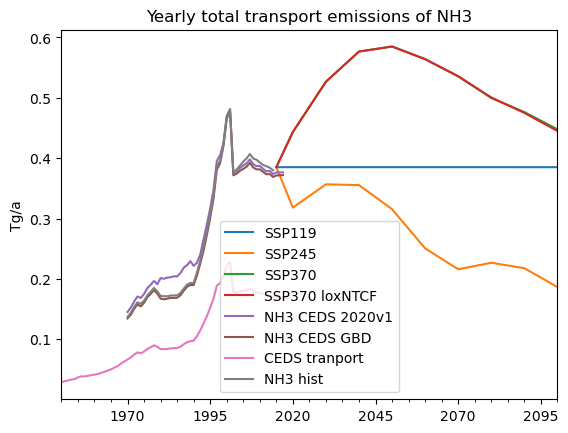

In [107]:
ax = emissions_NH3_road.plot()
NH3_ceds_v1_emissions.plot(ax=ax)
nh3_ceds_gbd_emissions.plot(ax=ax)
ceds_nh3_data.plot(ax=ax)
NH3_hist_emissions[220:].plot(ax= ax)
ax.set_title('Yearly total transport emissions of NH3')
ax.set_ylabel('Tg/a')

### All together

Text(0, 0.5, 'Tg')

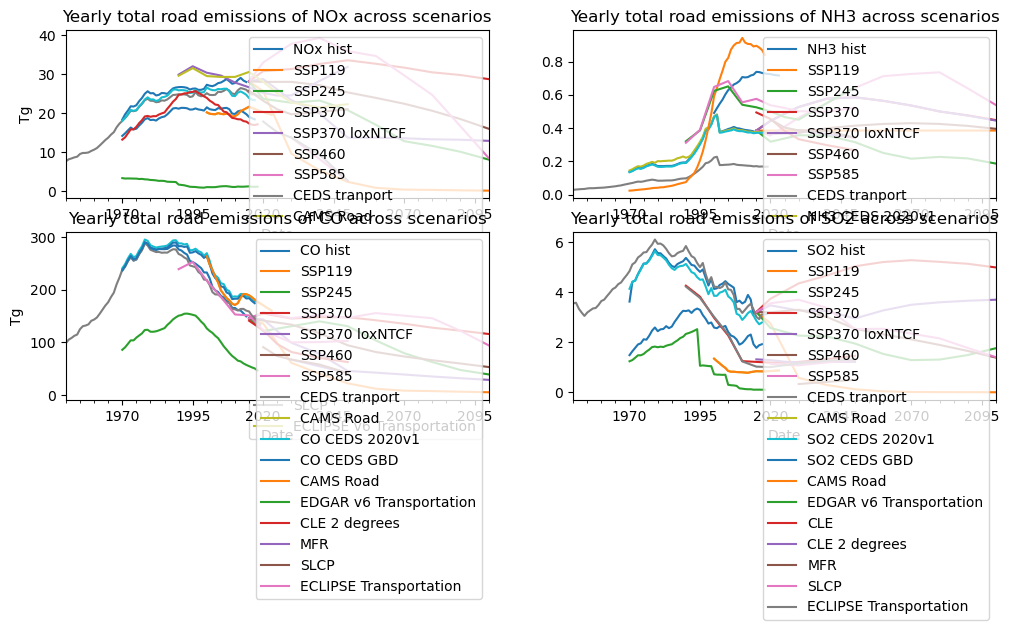

In [130]:
fig4, axs4 = plt.subplots(2,2)
fig4.set_figwidth(12)

NOx_hist_emissions[220:].plot(ax= axs4[0,0])
emissions_NOx_road.plot(title = 'Yearly total road emissions of NOx across scenarios', ax= axs4[0,0])
NOx_ssp460_road.plot(ax= axs4[0,0])
NOx_ssp585_road.plot(ax= axs4[0,0])
ceds_nox_data.plot(ax= axs4[0,0])
cams_nox_data.plot(ax= axs4[0,0])
NOx_ceds_v1_emissions.plot(ax=axs4[0,0])
NOx_ceds_gbd_emissions.plot(ax=axs4[0,0])
cams_nox_data.plot(ax= axs4[0,0])
edgar_nox_data.plot(ax=axs4[0,0])
eclipse5_cle_nox_data.plot(ax=axs4[0,0])
eclipse5_cle2degrees_nox_data.plot(ax=axs4[0,0])
eclipse5_mfr_nox_data.plot(ax=axs4[0,0])
eclipse5_slcp_nox_data.plot(ax=axs4[0,0])
eclipse_nox_data.plot(ax=axs4[0,0])


NH3_hist_emissions[220:].plot(ax= axs4[0,1])
emissions_NH3_road.plot(title = 'Yearly total road emissions of NH3 across scenarios', ax= axs4[0,1])
NH3_ssp460_road.plot(ax= axs4[0,1])
NH3_ssp585_road.plot(ax= axs4[0,1])
ceds_nh3_data.plot(ax= axs4[0,1])
NH3_ceds_v1_emissions.plot(ax=axs4[0,1])
nh3_ceds_gbd_emissions.plot(ax=axs4[0,1])
cams_nh3_data.plot(ax= axs4[0,1])
edgar_nh3_data.plot(ax=axs4[0,1])
eclipse5_cle_nh3_data.plot(ax=axs4[0,1])
eclipse5_cle2degrees_nh3_data.plot(ax=axs4[0,1])
eclipse5_mfr_nh3_data.plot(ax=axs4[0,1])
eclipse5_slcp_nh3_data.plot(ax=axs4[0,1])
eclipse_nh3_data.plot(ax=axs4[0,1])


CO_hist_emissions[220:].plot(ax= axs4[1,0])
emissions_CO_road.plot(title = 'Yearly total road emissions of CO across scenarios', ax= axs4[1,0])
CO_ssp460_road.plot(ax= axs4[1,0])
CO_ssp585_road.plot(ax= axs4[1,0])
ceds_co_data.plot(ax= axs4[1,0])
cams_co_data.plot(ax= axs4[1,0])
CO_ceds_v1_emissions.plot(ax=axs4[1,0])
co_ceds_gbd_emissions.plot(ax=axs4[1,0])
cams_co_data.plot(ax= axs4[1,0])
edgar_co_data.plot(ax=axs4[1,0])
eclipse5_cle_co_data.plot(ax=ax)
eclipse5_cle2degrees_co_data.plot(ax=axs4[1,0])
eclipse5_mfr_co_data.plot(ax=axs4[1,0])
eclipse5_slcp_co_data.plot(ax=axs4[1,0])
eclipse_co_data.plot(ax=axs4[1,0])


SO2_hist_emissions[220:].plot(ax= axs4[1,1])
emissions_SO2_road.plot(title = 'Yearly total road emissions of SO2 across scenarios', ax= axs4[1,1])
SO2_ssp460_road.plot(ax= axs4[1,1])
SO2_ssp585_road.plot(ax= axs4[1,1])
ceds_so2_data.plot(ax= axs4[1,1])
cams_so2_data.plot(ax= axs4[1,1])
SO2_ceds_v1_emissions.plot(ax=axs4[1,1])
SO2_ceds_gbd_emissions.plot(ax=axs4[1,1])
cams_so2_data.plot(ax= axs4[1,1])
edgar_so2_data.plot(ax=axs4[1,1])
eclipse5_cle_so2_data.plot(ax=axs4[1,1])
eclipse5_cle2degrees_so2_data.plot(ax=axs4[1,1])
eclipse5_mfr_so2_data.plot(ax=axs4[1,1])
eclipse5_slcp_so2_data.plot(ax=axs4[1,1])
eclipse_so2_data.plot(ax=axs4[1,1])


axs4[0,0].set_ylabel('Tg')
axs4[1,0].set_ylabel('Tg')




Text(0, 0.5, 'Tg(NO)')

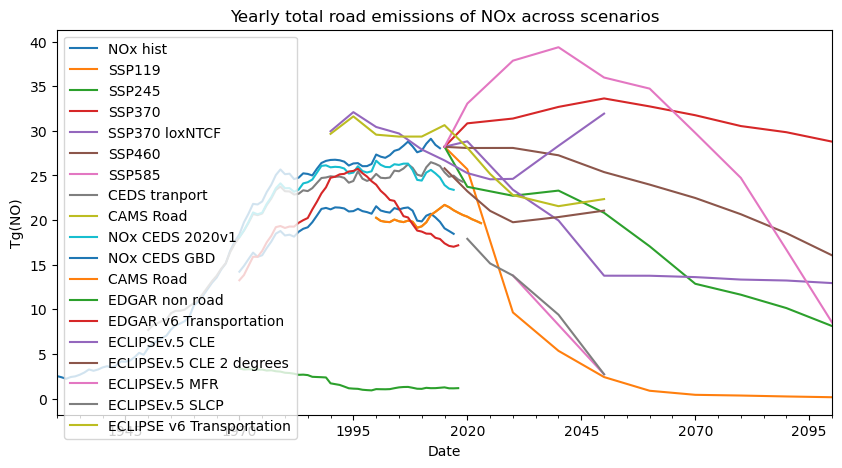

In [161]:
ax = NOx_hist_emissions[180:].plot(figsize=(10,5))
emissions_NOx_road.plot(title = 'Yearly total road emissions of NOx across scenarios', ax= ax)

NOx_ssp460_road.plot(ax= ax)
NOx_ssp585_road.plot(ax= ax)
ceds_nox_data.plot(ax= ax)
cams_nox_data.plot(ax= ax)
NOx_ceds_v1_emissions.plot(ax=ax)
NOx_ceds_gbd_emissions.plot(ax=ax)
cams_nox_data.plot(ax= ax)
edgar_nox_data.plot(ax=ax)
eclipse5_cle_nox_data.plot(ax=ax, label = 'eclispe vf cle')
eclipse5_cle2degrees_nox_data.plot(ax=ax)
eclipse5_mfr_nox_data.plot(ax=ax)
eclipse5_slcp_nox_data.plot(ax=ax)
eclipse_nox_data.plot(ax=ax)


ax.set_ylabel('Tg(NO)')

In [162]:
ax = NH3_hist_emissions[220:].plot(figsize=(10,5))
emissions_NH3_road.plot(title = 'Yearly total road emissions of NH3 across scenarios', ax= ax)
NH3_ssp460_road.plot(ax= ax)
NH3_ssp585_road.plot(ax= ax)
ceds_nh3_data.plot(ax= ax)
NH3_ceds_v1_emissions.plot(ax=ax)
nh3_ceds_gbd_emissions.plot(ax=ax)
cams_nh3_data.plot(ax= ax)
edgar_nh3_data.plot(ax=ax)
eclipse5_cle_nh3_data.plot(ax=ax)
eclipse5_cle2degrees_nh3_data.plot(ax=ax)
eclipse5_mfr_nh3_data.plot(ax=ax)
eclipse5_slcp_nh3_data.plot(ax=ax)
eclipse_nh3_data.plot(ax=ax)

ax.set_ylabel('Tg')

Text(0, 0.5, 'Tg')

In [163]:
ax = CO_hist_emissions[220:].plot(figsize=(10,5))
emissions_CO_road.plot(title = 'Yearly total road emissions of CO across scenarios', ax= ax)
CO_ssp460_road.plot(ax= ax)
CO_ssp585_road.plot(ax= ax)
ceds_co_data.plot(ax= ax)
cams_co_data.plot(ax= ax)
CO_ceds_v1_emissions.plot(ax=ax)
co_ceds_gbd_emissions.plot(ax=ax)
cams_co_data.plot(ax= ax)
edgar_co_data.plot(ax=ax)
eclipse5_cle_co_data.plot(ax=ax)
eclipse5_cle2degrees_co_data.plot(ax=ax)
eclipse5_mfr_co_data.plot(ax=ax)
eclipse5_slcp_co_data.plot(ax=ax)
eclipse_co_data.plot(ax=ax)

ax.set_ylabel('Tg')

Text(0, 0.5, 'Tg')

Text(0, 0.5, 'Tg')

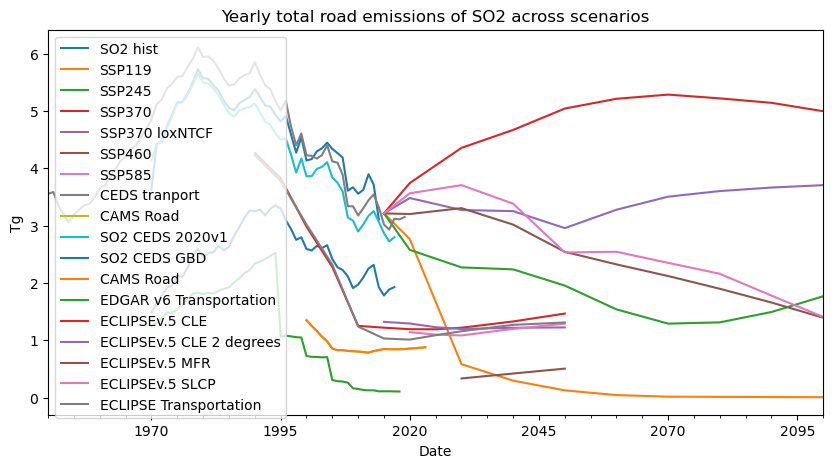

In [164]:
ax = SO2_hist_emissions[220:].plot(figsize=(10,5))
emissions_SO2_road.plot(title = 'Yearly total road emissions of SO2 across scenarios', ax= ax)
SO2_ssp460_road.plot(ax= ax)
SO2_ssp585_road.plot(ax= ax)
ceds_so2_data.plot(ax= ax)
cams_so2_data.plot(ax= ax)
SO2_ceds_v1_emissions.plot(ax=ax)
SO2_ceds_gbd_emissions.plot(ax=ax)
cams_so2_data.plot(ax= ax)
edgar_so2_data.plot(ax=ax)
eclipse5_cle_so2_data.plot(ax=ax)
eclipse5_cle2degrees_so2_data.plot(ax=ax)
eclipse5_mfr_so2_data.plot(ax=ax)
eclipse5_slcp_so2_data.plot(ax=ax)
eclipse_so2_data.plot(ax=ax)

ax.set_ylabel('Tg')